In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Leyendo el dataset

In [144]:
## generando nombres de las columnas
arr=[]
for i in range(4):
    arr.append('time'+str(i))
    arr.append('current'+str(i))
    

In [8]:
sintetic_data=pd.read_csv('data.csv',names=arr)

In [10]:
sintetic_data.tail()

,time0,current0,time1,current1,time2,current2,time3,current3
25,26,50,26,50,26,55,26,50
26,27,50,27,50,27,50,27,50
27,28,50,28,50,28,50,28,50
28,29,50,29,50,29,50,29,50
29,30,50,30,50,30,50,30,50


## Testeando la generacion de los datos para un caso

In [84]:
## creando valores hasta 6 horas
## 
## lo ideal es introducir ligeras variaciones a los nuevos datos
media=50
desviacion=0.2
current=np.random.normal(media, desviacion, 330)

#este codigo sirve para rellenar de un solo valor los datos faltantes
#actual_current=50
#current = np.array([actual_current for i in range(0,330)])

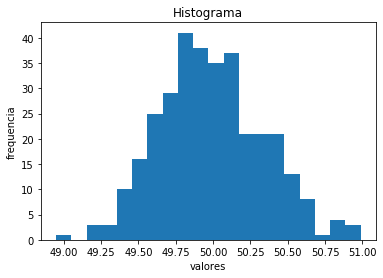

In [85]:
# para verificar la variacion de los datos segun la deviacion usada
# histograma de distribución normal.
cuenta, cajas, ignorar = plt.hist(datos, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma')
plt.show()

In [86]:
## generando los indices de tiempo
time=np.array([i for i in range(31,361)])

In [87]:
plus_time=np.append(np.array(sintetic_data['time0']),time)
plus_current=np.append(np.array(sintetic_data['current0']),current)

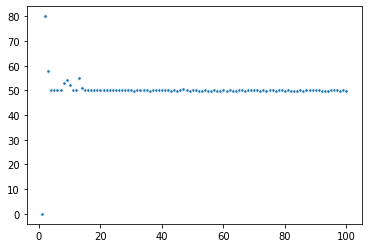

In [100]:
sns.scatterplot(plus_time[:100],plus_current[:100],s=12)

## Generando dataframe final

In [102]:
## se crean los valores para anyadir al dataset inicial
media=50
desviacion=0.2
generating=np.array([time,np.random.normal(media, desviacion, 330),time,np.random.normal(media, desviacion, 330),time,np.random.normal(media, desviacion, 330),time,np.random.normal(media, desviacion, 330)])

In [117]:
## trnaspuesta para cambiar el orden de columnas y filas
generating=generating.transpose()

In [134]:
## creando dataframe , importante para la concatenacion asignar los mismos nombres de columnas
df_generating=pd.DataFrame(generating,columns=sintetic_data.columns)

In [135]:
df_generating

,time0,current0,time1,current1,time2,current2,time3,current3
0,31.0,50.425563,31.0,49.896725,31.0,49.784992,31.0,49.947407
1,32.0,50.095227,32.0,50.197654,32.0,49.949529,32.0,50.140005
2,33.0,50.196260,33.0,49.915558,33.0,49.802211,33.0,49.619741
3,34.0,49.647017,34.0,49.863959,34.0,49.997121,34.0,50.119604
4,35.0,50.024863,35.0,49.948248,35.0,50.257367,35.0,50.226410
...,...,...,...,...,...,...,...,...
325,356.0,49.773217,356.0,49.871064,356.0,50.154195,356.0,49.697781
326,357.0,50.239024,357.0,49.950369,357.0,49.488579,357.0,49.949983
327,358.0,50.021850,358.0,49.729930,358.0,50.070155,358.0,49.814249
328,359.0,50.120278,359.0,49.778753,359.0,49.704292,359.0,49.977069


In [140]:
## se unen los dos dataset el original y el nuevo 
df_sintetic=pd.concat([sintetic_data,df_generating],ignore_index=True)

In [143]:
df_sintetic

,time0,current0,time1,current1,time2,current2,time3,current3
0,1.0,0.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000
1,2.0,80.000000,2.0,90.000000,2.0,75.000000,2.0,87.000000
2,3.0,58.000000,3.0,53.000000,3.0,55.000000,3.0,55.000000
3,4.0,50.000000,4.0,50.000000,4.0,50.000000,4.0,50.000000
4,5.0,50.000000,5.0,50.000000,5.0,53.000000,5.0,50.000000
...,...,...,...,...,...,...,...,...
355,356.0,49.773217,356.0,49.871064,356.0,50.154195,356.0,49.697781
356,357.0,50.239024,357.0,49.950369,357.0,49.488579,357.0,49.949983
357,358.0,50.021850,358.0,49.729930,358.0,50.070155,358.0,49.814249
358,359.0,50.120278,359.0,49.778753,359.0,49.704292,359.0,49.977069


## Ploteando las curvas

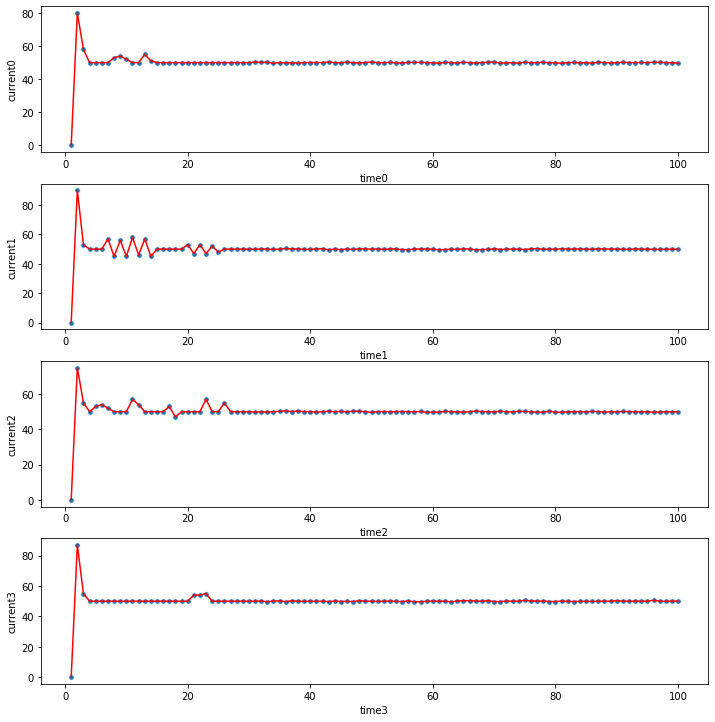

In [173]:
## variar figsize para variar el tamanyo de la figura , y la variable s para el tamanyo de los puntos
f,axes = plt.subplots(4,1,figsize=(10,10))
f.tight_layout()

for i in range(0,4):
    sns.scatterplot(df_sintetic['time'+str(i)][:100],df_sintetic['current'+str(i)][:100],s=30,ax=axes[i])
    sns.lineplot(df_sintetic['time'+str(i)][:100],df_sintetic['current'+str(i)][:100],color='red',ax=axes[i])
## solo se ploteo los 100 primeros datos para tener mayor visibilidad del patron inicial